In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
train = fetch_20newsgroups(subset='train',shuffle=True)
test = fetch_20newsgroups(subset='test',shuffle=True)

In [3]:
model = Pipeline([
    ('vect',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('clf',MultinomialNB())
])

In [4]:
model.fit(train.data,train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [5]:
pred = model.predict(test.data)

In [7]:
print("Accuracy : ",metrics.accuracy_score(test.target,pred))

Accuracy :  0.7738980350504514


In [9]:
print("Classification Report : \n")
print(metrics.classification_report(test.target,pred,target_names=test.target_names))

Classification Report : 

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84      0.60      0.70       393
                 sci.med       0.92      0.74    

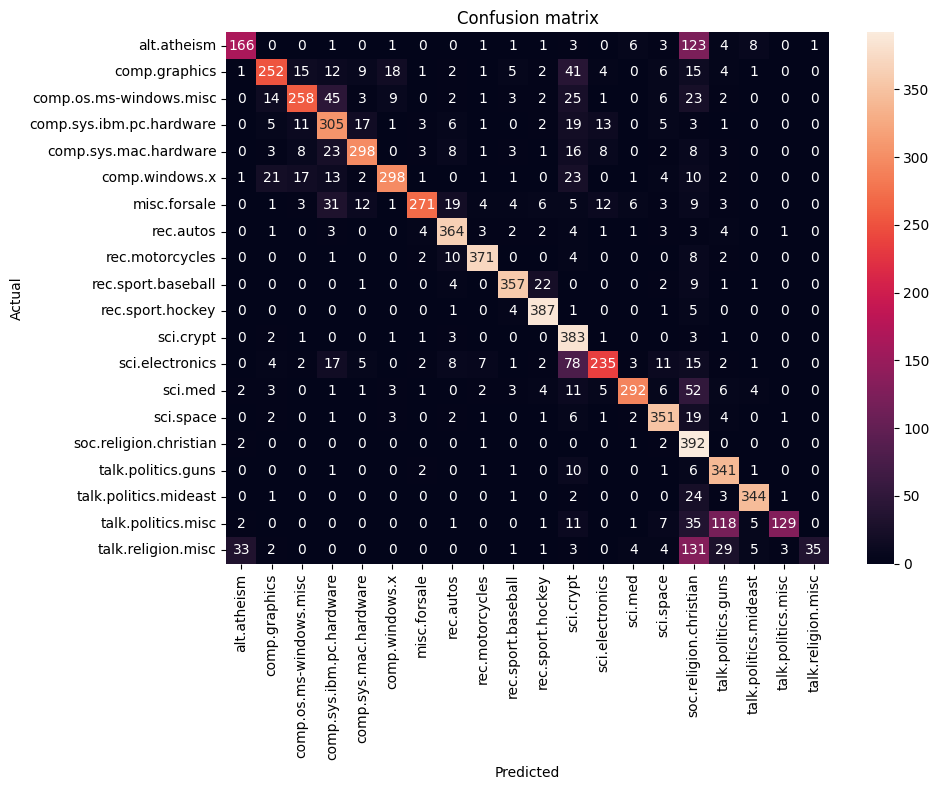

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(metrics.confusion_matrix(test.target,pred),
           fmt='d',
           annot=True,
           xticklabels=test.target_names,
           yticklabels=test.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.tight_layout()
plt.show()

In [13]:
joblib.dump(model,"text_clssifier.pkl")

['text_clssifier.pkl']